In [1]:
import pandas_datareader.data as web   # my local kernel Python 3.10.7 
import matplotlib.pyplot as plt  
# unavailable?  do: 1. pip uninstall matplotlib
                  # 2. python3 -m pip install matplotlib;   python3 -m pip installmpl_finance
%matplotlib inline
import datetime
import numpy as np
import pandas as pd

In [57]:
start = datetime.datetime(2012,1,1)
end   = datetime.datetime(2020,9,20)

In [58]:
tesla = web.DataReader('TSLA', 'yahoo', start, end)
ford = web.DataReader('F', 'yahoo',start,end)
gm = web.DataReader("GM", 'yahoo', start, end)
google = web.DataReader('GOOGL', 'yahoo', start, end)

In [11]:
tesla.to_csv('data/Tesla_Stock.csv')
ford.to_csv('data/Ford_Stock.csv')
gm.to_csv('data/GM_Stock.csv')
google.to_csv('data/Google_Stock.csv')

In [100]:
google.shape

(2193, 6)

In [59]:
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,16.720470,16.325577,16.339840,16.651901,146912940.0,16.651901
2012-01-04,16.773024,16.532032,16.642391,16.723724,114445440.0,16.723724
2012-01-05,16.615866,16.422173,16.569820,16.491741,131184684.0,16.491741
2012-01-06,16.516518,16.261011,16.495245,16.266768,107608284.0,16.266768
2012-01-09,16.191191,15.546296,16.178679,15.577077,232671096.0,15.577077


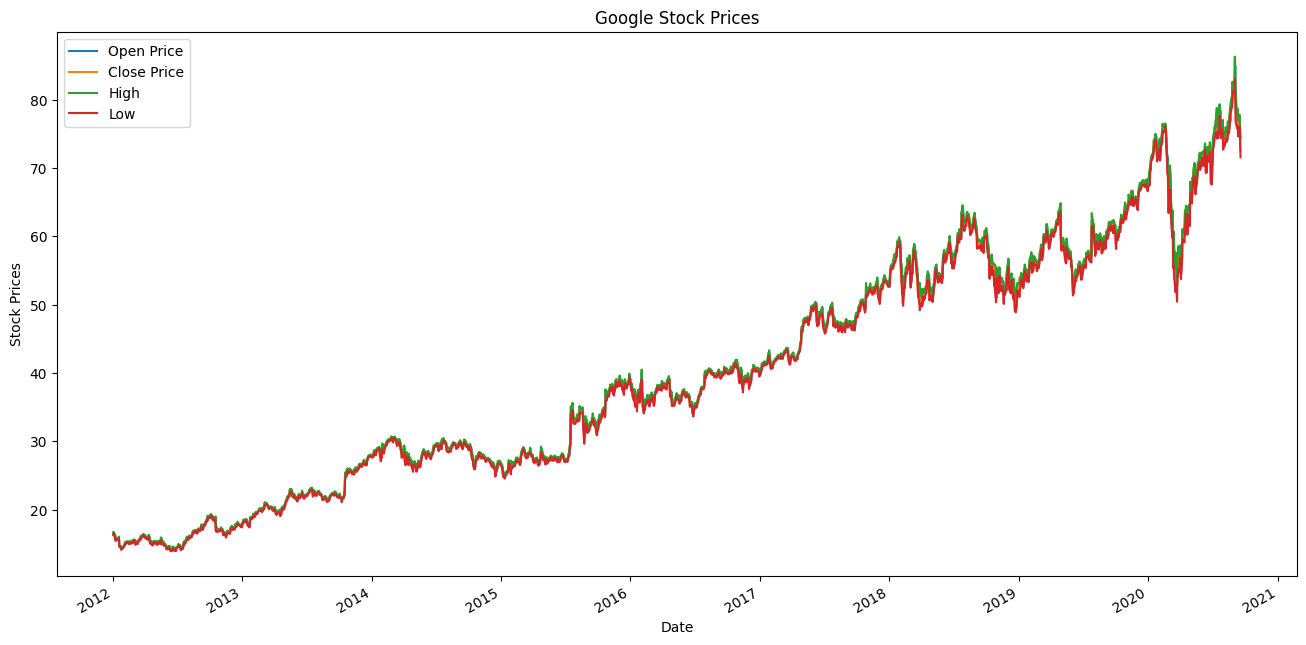

In [60]:
google.Open.plot(label = 'Open Price', figsize=(16,8))
google.Close.plot(label= "Close Price")
google.High.plot(label= 'High')
google.Low.plot(label= 'Low')
plt.legend()
plt.title('Google Stock Prices')
plt.ylabel('Stock Prices')
plt.show()

<AxesSubplot: xlabel='Date'>

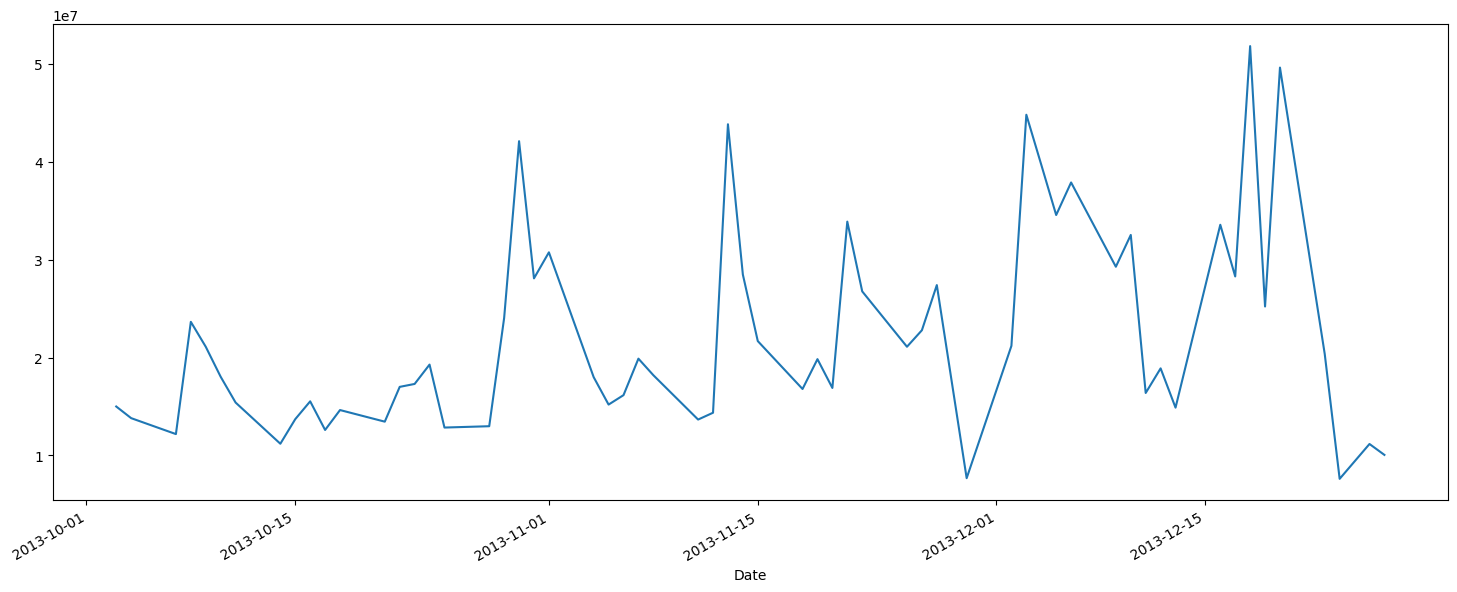

In [85]:
gm.Volume.iloc[440:500].plot(figsize=(18,7))

<AxesSubplot: xlabel='Date'>

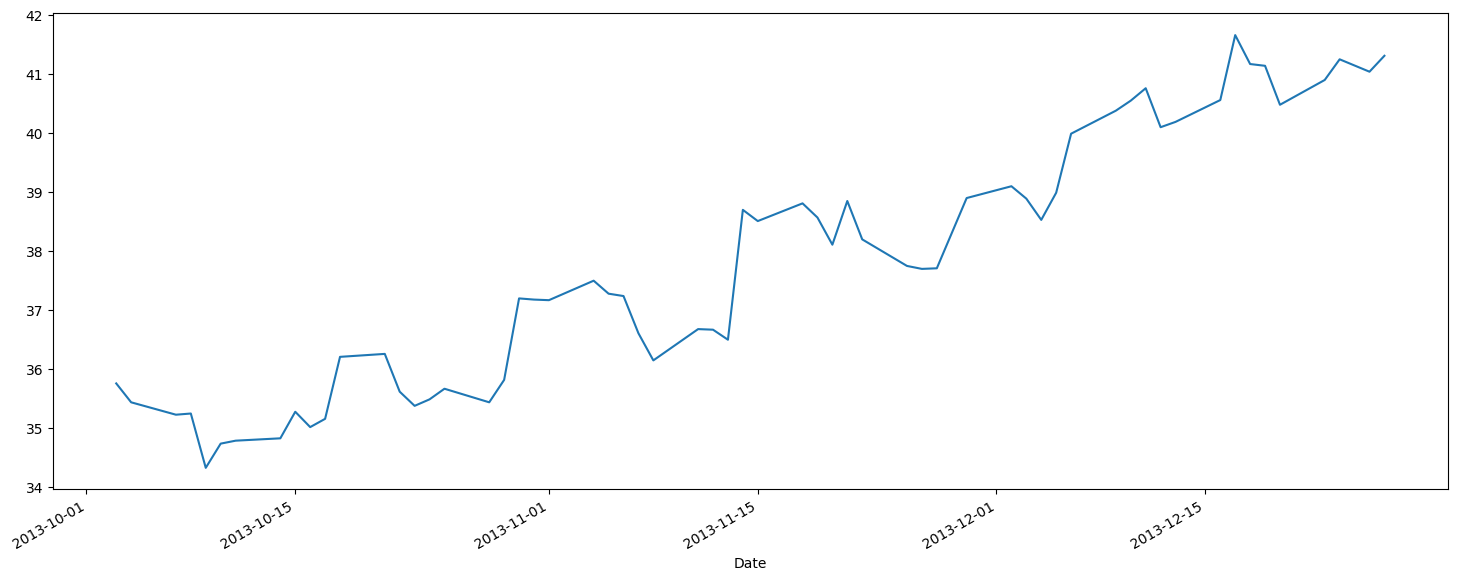

In [84]:
gm.Open.iloc[440:500].plot(figsize=(18,7))

Text(0.5, 1.0, 'Stock Prices of Tesla, Ford, GM')

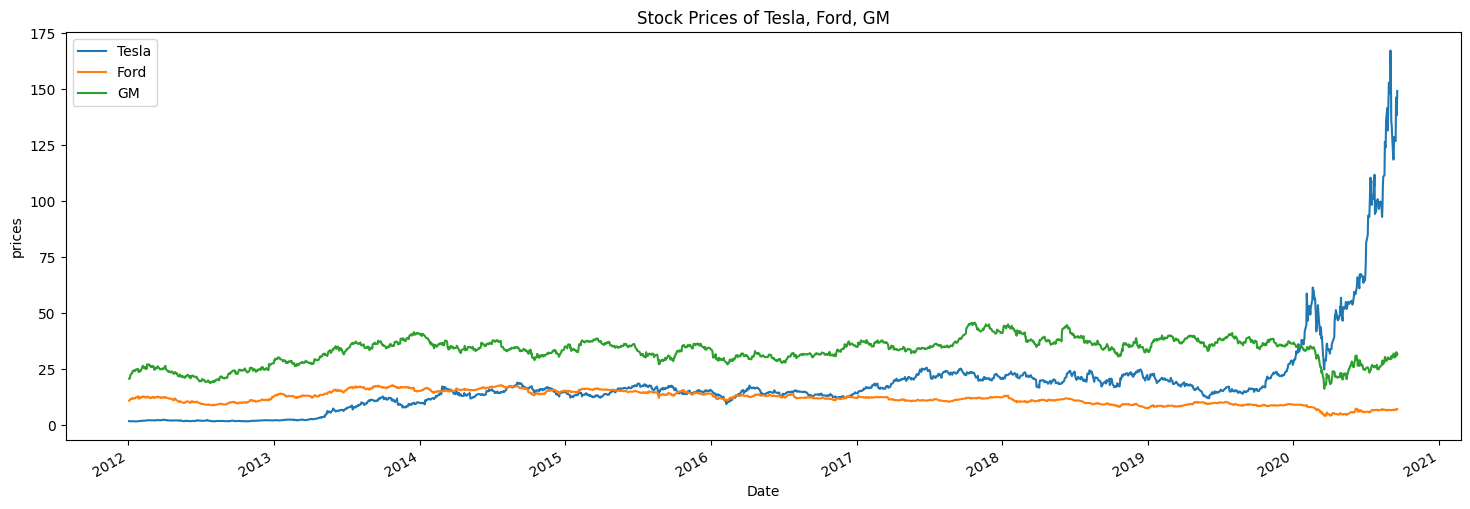

In [62]:
tesla.Open.plot(label='Tesla', figsize=(18,6))
ford.Open.plot(label='Ford')
gm.Open.plot(label='GM', figsize=(18,6))
plt.legend()
plt.ylabel('prices')
plt.title("Stock Prices of Tesla, Ford, GM")


<AxesSubplot: xlabel='Date'>

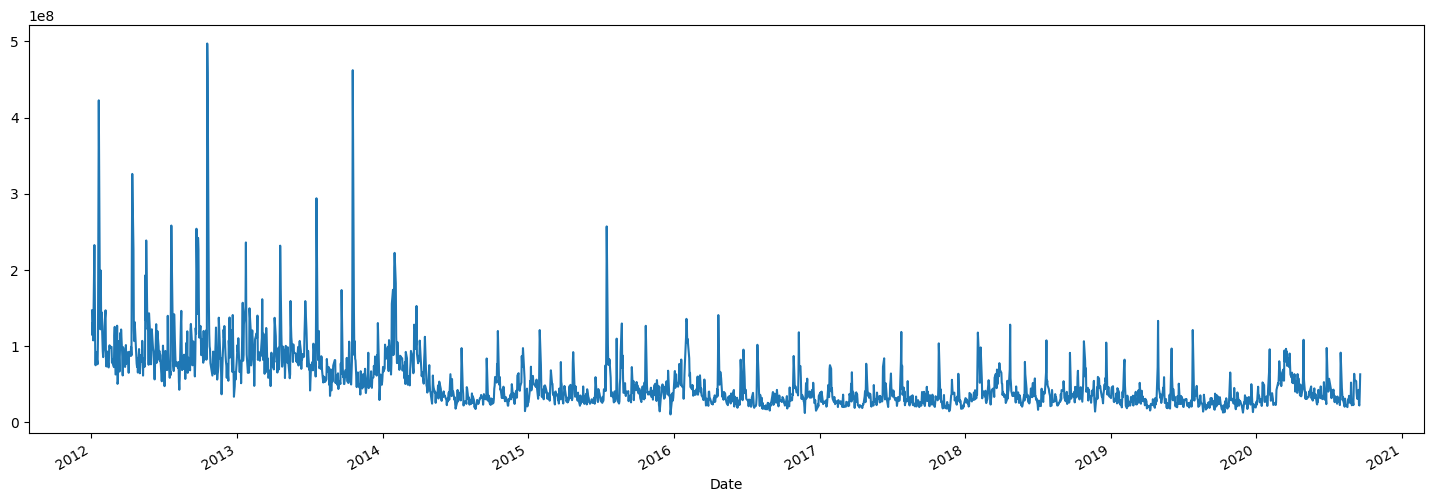

In [63]:
google.Volume.plot(figsize=(18,6))

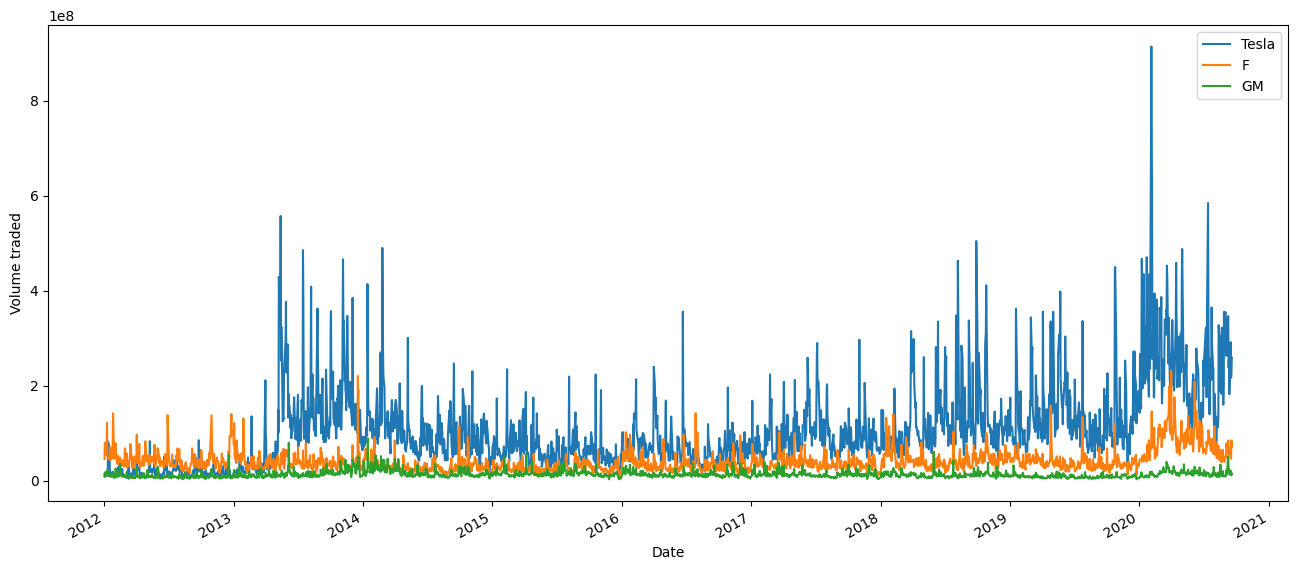

In [65]:
tesla.Volume.plot(label='Tesla', figsize=(16,7))
ford.Volume.plot(label="F")
gm.Volume.plot(label="GM")
plt.ylabel('Volume traded')
plt.legend()

<AxesSubplot: xlabel='Date'>

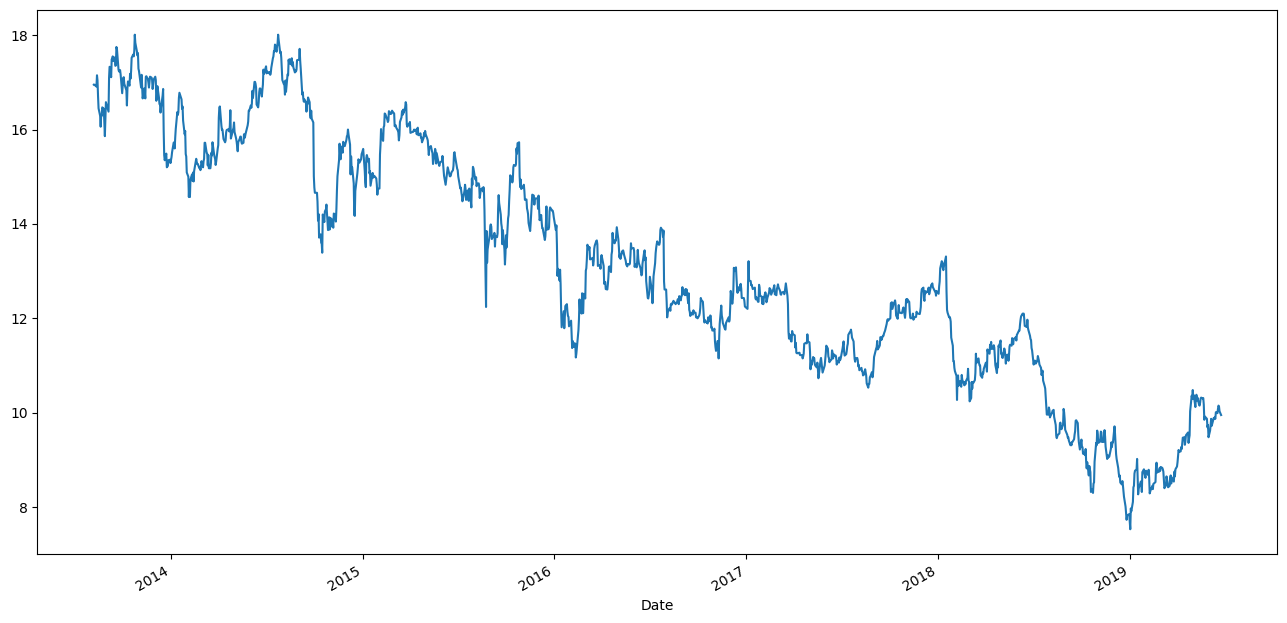

In [66]:
ford.iloc[400:1880]['Open'].plot(figsize=(16,8))

#### Market Cap and Volume 

In [67]:
tesla['Total_Traded'] = tesla['Open'] * tesla.Volume
ford['Total_Traded'] = ford['Open'] * ford.Volume
gm['Total_Traded'] = gm['Open'] * gm.Volume

In [68]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total_Traded
Date,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.232353,1.941627e+08
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.309464,1.653835e+08
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.096022,3.772807e+08
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.674370,4.059000e+08
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.612680,2.803604e+08


Text(0, 0.5, 'Total Traded')

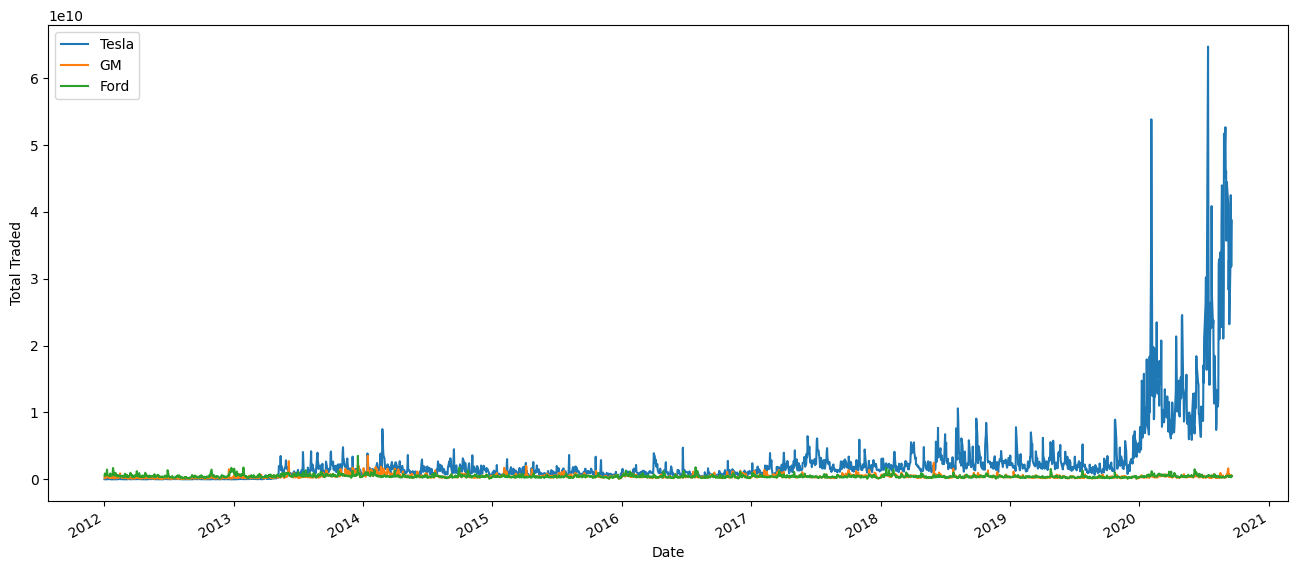

In [69]:
tesla.Total_Traded.plot(label='Tesla', figsize=(16,7))
gm.Total_Traded.plot(label='GM', figsize=(16,7))
ford.Total_Traded.plot(label='Ford', figsize=(16,7))
plt.legend()
plt.ylabel('Total Traded')

<AxesSubplot: xlabel='Date'>

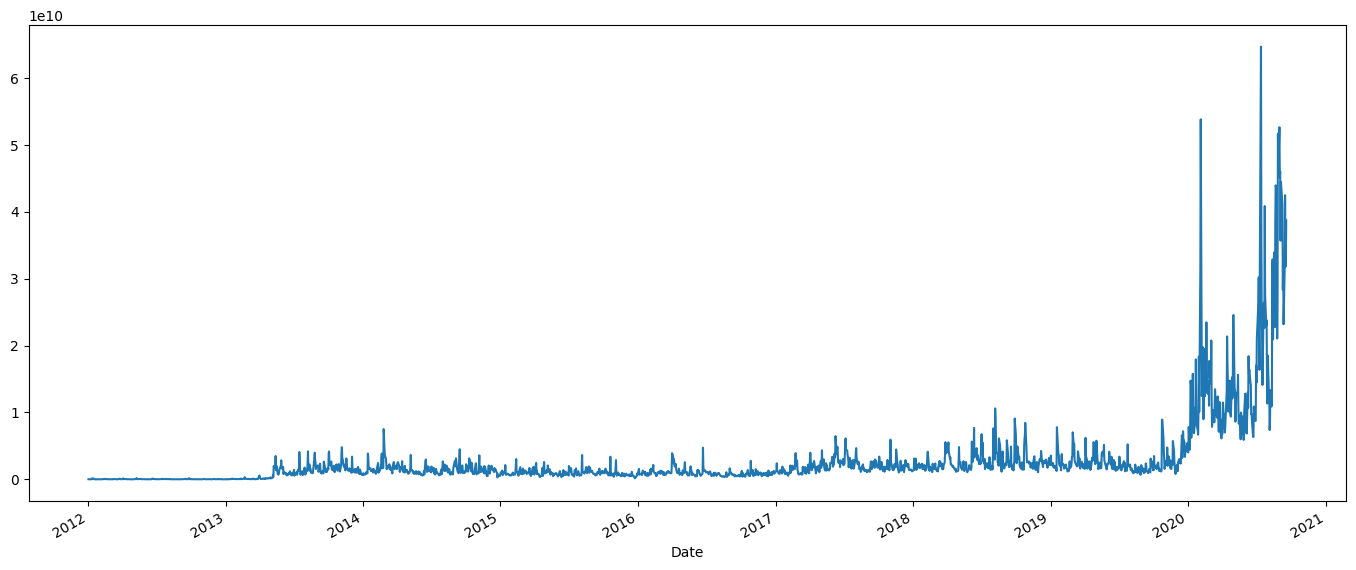

In [72]:
tesla.Total_Traded.plot(figsize=(17,7))

In [75]:
tesla.iloc[[tesla['Total_Traded'].argmax()]] # get the max traded Volume day

,High,Low,Open,Close,Volume,Adj Close,Total_Traded
Date,,,,,,,
2020-07-13,119.666,98.073997,110.599998,99.804001,584781000.0,99.804001,6.467678e+10


Moving Average

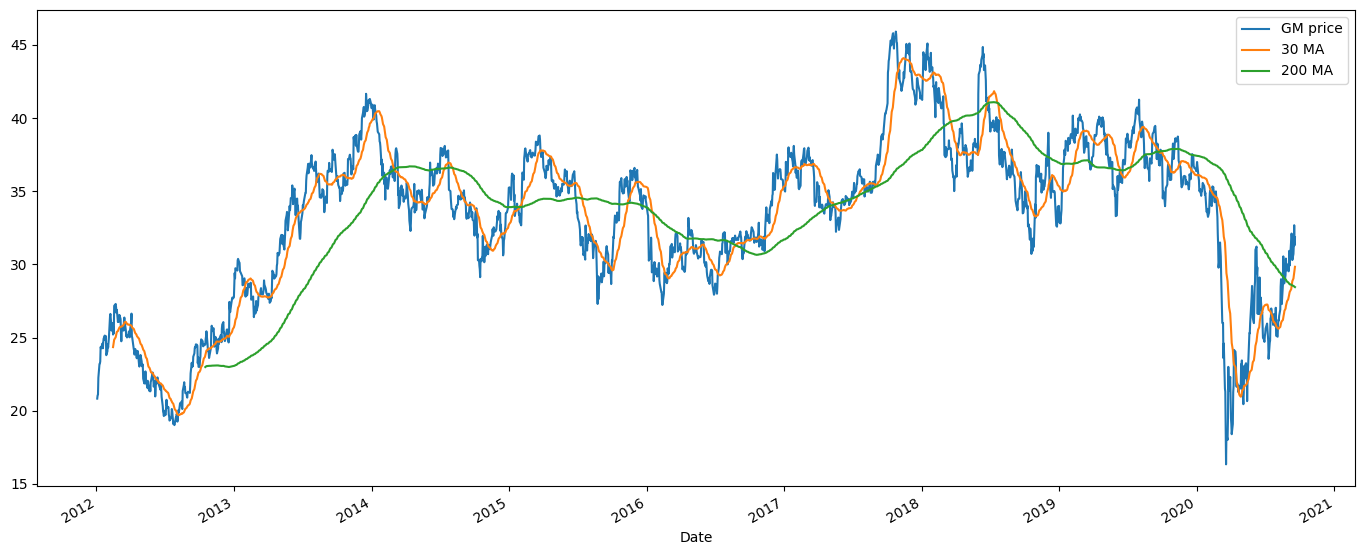

In [92]:
gm.Open.plot(label="GM price",figsize=(17,7))
gm['MA30'] = gm.Open.rolling(30).mean() 
gm['MA30'].plot(label='30 MA')
gm['MA200'] = gm.Open.rolling(200).mean()
gm['MA200'].plot(label= '200 MA')
plt.legend()

### Correlation and Scatter Matrix

In [95]:
from pandas.plotting import scatter_matrix

In [117]:
car_comp = pd.concat([tesla.Open, gm.Open, ford.Open], axis=1)
car_comp.columns = ['Tesla_Open', 'GM_Open', 'Ford_Open']

In [118]:
car_comp.head()

,Tesla_Open,GM_Open,Ford_Open
Date,,,
2012-01-03,1.929333,20.830000,11.00
2012-01-04,1.880667,21.049999,11.15
2012-01-05,1.850667,21.100000,11.33
2012-01-06,1.813333,22.260000,11.74
2012-01-09,1.800000,23.200001,11.83


array([[<AxesSubplot: xlabel='Tesla_Open', ylabel='Tesla_Open'>,
        <AxesSubplot: xlabel='GM_Open', ylabel='Tesla_Open'>,
        <AxesSubplot: xlabel='Ford_Open', ylabel='Tesla_Open'>],
       [<AxesSubplot: xlabel='Tesla_Open', ylabel='GM_Open'>,
        <AxesSubplot: xlabel='GM_Open', ylabel='GM_Open'>,
        <AxesSubplot: xlabel='Ford_Open', ylabel='GM_Open'>],
       [<AxesSubplot: xlabel='Tesla_Open', ylabel='Ford_Open'>,
        <AxesSubplot: xlabel='GM_Open', ylabel='Ford_Open'>,
        <AxesSubplot: xlabel='Ford_Open', ylabel='Ford_Open'>]],
      dtype=object)

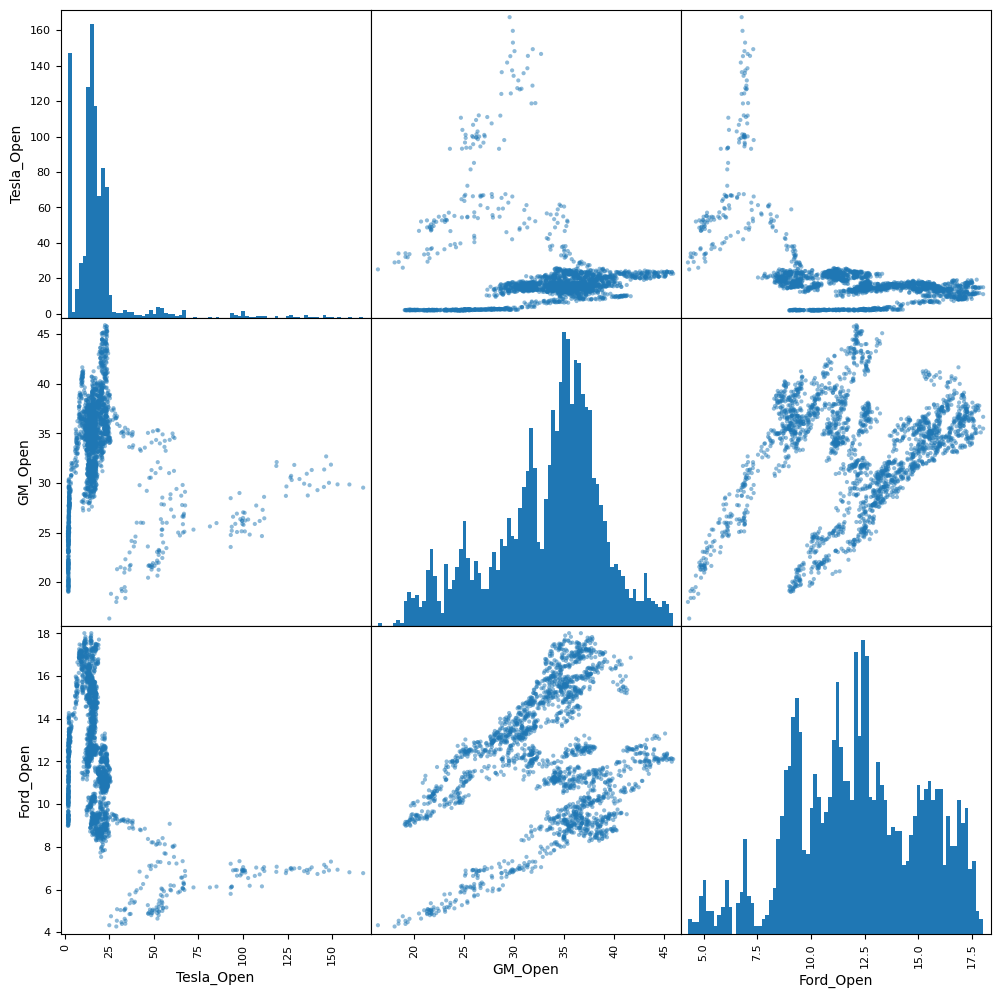

In [119]:
scatter_matrix(car_comp, figsize=(12,12), hist_kwds={'bins':80})

### Charts candlesticks

In [124]:
from mpl_finance import candlestick_ohlc  # use as mpl_finance or mplfinance
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [262]:
ford_reset = ford.loc['2012-01': '2012-06'].reset_index()
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))  # add column date_ax w date2num
ford_values = [tuple(vals) for vals in ford_reset[['date_ax', 'Open', 'High', 'Low' ,'Close']].values] # prepare vals for candles

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b &d')
dayFormatter = DateFormatter('%d')                                           

In [263]:
ford_reset.shape

(125, 10)

In [264]:
ford_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total_Traded,returns,date_ax
0,2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.345916,5.028089e+08,NaN,15342.0
1,2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.458115,8.889359e+08,0.015274,15343.0
2,2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.649521,7.690521e+08,0.025664,15344.0
3,2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.728723,7.025298e+08,0.010354,15345.0
4,2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.788125,6.386011e+08,0.007686,15348.0


In [265]:
ford_values = [tuple(vals) for vals in ford_reset[['date_ax', 'Open', 'High', 'Low' ,'Close']].values]
# ford_values = [print(tuple(vals)) for vals in ford_reset[['date_ax', 'Open', 'High', 'Low' ,'Close']].values]

In [ ]:
ford_values

In [ ]:
nontuple = [print(vals) for vals in ford_reset[['date_ax', 'Open', 'Low' ,'High','Close']].values]

In [ ]:
type(ford_values) # list
for l in ford_values:
    print(len(l), l, '\n', l[0])   # confirm shape  = 5[0,1,2,3,4]

([<matplotlib.lines.Line2D at 0x2ac44d8fd30>,
  <matplotlib.patches.Rectangle at 0x2ac461d7760>])

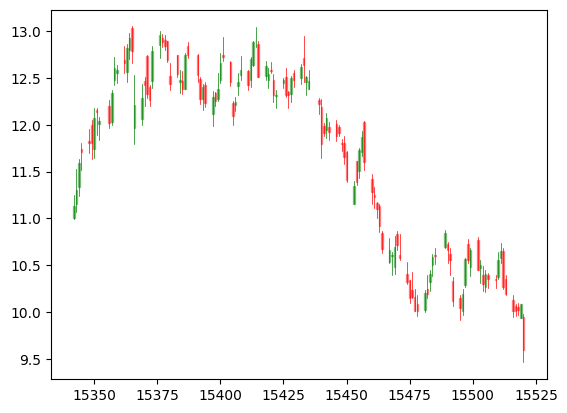

In [266]:
fig, ax = plt.subplots()
candlestick_ohlc(ax, ford_values, width= 0.6, colorup='g', colordown='r', alpha=0.4)

### Daily % change 
Rt = (Pt / Pt-1) -1

In [231]:
tesla['returns'] = (tesla.Close / tesla.Close.shift(1)) - 1 #  shift 1 day back
gm['returns'] = (gm.Close / gm.Close.shift(1)) - 1 
ford['returns'] = (ford.Close / ford.Close.shift(1)) - 1 

In [230]:
tesla.sample(5)

,High,Low,Open,Close,Volume,Adj Close,Total_Traded,returns
Date,,,,,,,,
2016-08-09,15.436000,15.110000,15.121333,15.272000,33117000.0,15.272000,5.007732e+08,0.012911
2014-08-27,17.615999,17.352667,17.566668,17.549999,44776500.0,17.549999,7.865739e+08,0.005769
2012-09-19,2.116000,2.062667,2.066667,2.070000,15727500.0,2.070000,3.250351e+07,-0.009253
2014-06-25,15.836667,15.349333,15.536667,15.792667,87024000.0,15.792667,1.352063e+09,0.018882
2018-01-09,22.586666,21.826668,22.344000,22.246000,107199000.0,22.246000,2.395254e+09,-0.008085


In [ ]:
tesla['returns']


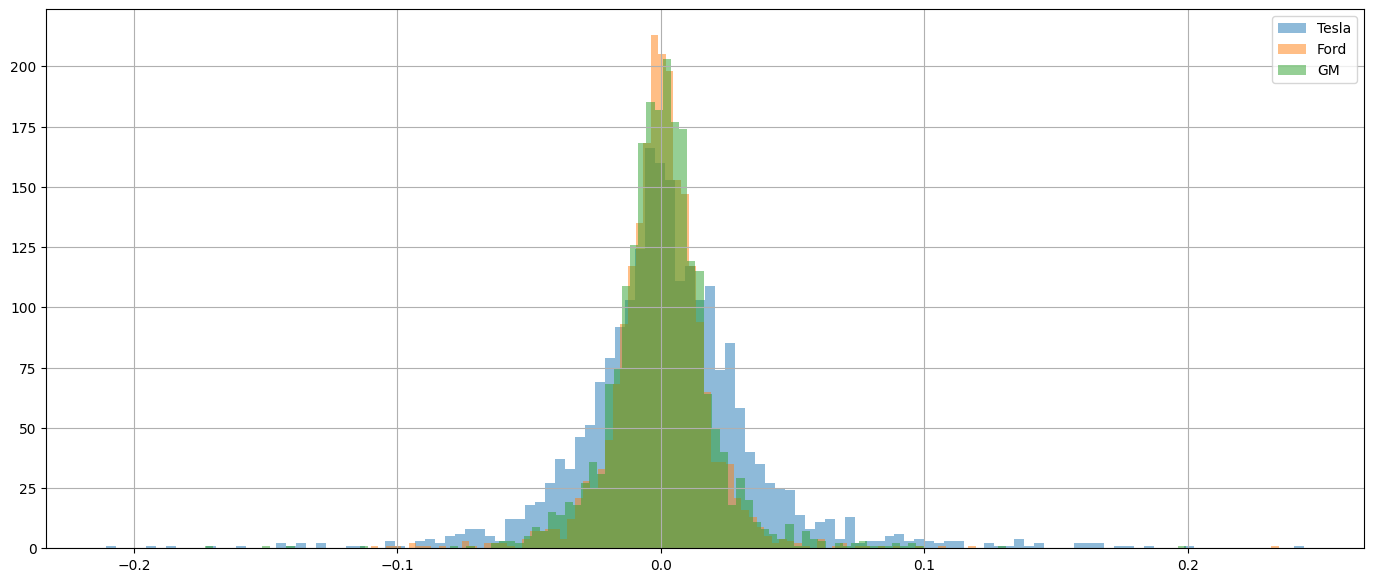

In [290]:
tesla['returns'].hist(bins=120, label='Tesla', alpha=.5, figsize=(17,7))
ford['returns'].hist(bins=120, label='Ford', alpha=.5)
gm['returns'].hist(bins=120, label='GM', alpha=.5) 
plt.legend()

- The higher the variance - the higher the STD Volatility  
- Greater width of distribution = greater STD &  Volatility 

<AxesSubplot: >

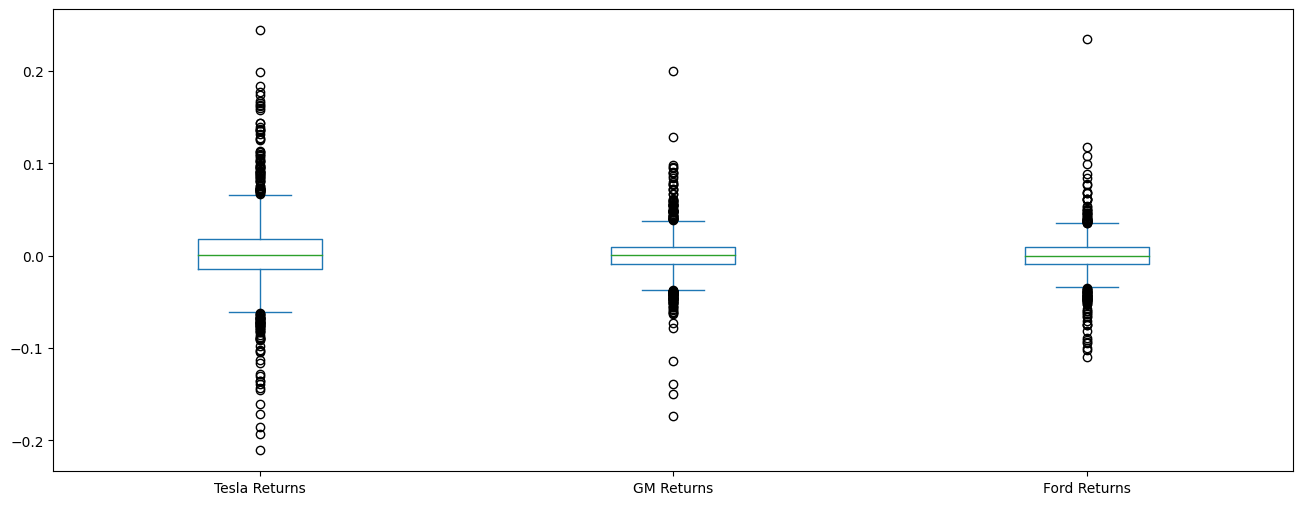

In [301]:
box_df = pd.concat([tesla['returns'], gm['returns'], ford['returns']], axis=1)
box_df.columns = ['Tesla Returns', 'GM Returns', 'Ford Returns']
box_df.plot(kind='box', figsize=(16,6))

array([[<AxesSubplot: xlabel='Tesla Returns', ylabel='Tesla Returns'>,
        <AxesSubplot: xlabel='GM Returns', ylabel='Tesla Returns'>,
        <AxesSubplot: xlabel='Ford Returns', ylabel='Tesla Returns'>],
       [<AxesSubplot: xlabel='Tesla Returns', ylabel='GM Returns'>,
        <AxesSubplot: xlabel='GM Returns', ylabel='GM Returns'>,
        <AxesSubplot: xlabel='Ford Returns', ylabel='GM Returns'>],
       [<AxesSubplot: xlabel='Tesla Returns', ylabel='Ford Returns'>,
        <AxesSubplot: xlabel='GM Returns', ylabel='Ford Returns'>,
        <AxesSubplot: xlabel='Ford Returns', ylabel='Ford Returns'>]],
      dtype=object)

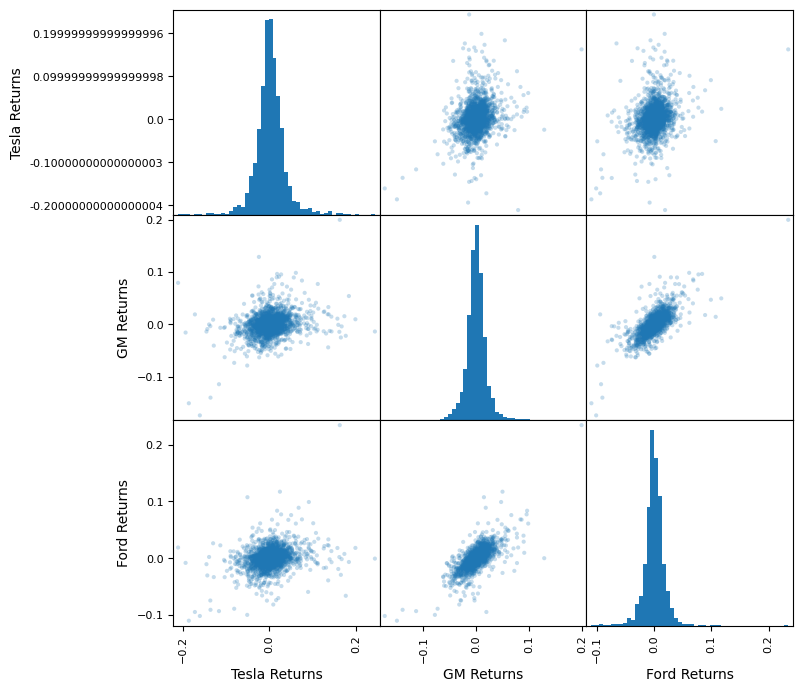

In [302]:
scatter_matrix(box_df, figsize=(8,8), hist_kwds={'bins':50}, alpha=.25)

### Cumulative Return
- It =(1 + Rs)It-1

In [314]:
tesla['Cumulative_Return'] = (1 + tesla['returns']).cumprod()
gm['Cumulative_Return'] = (1 + gm['returns']).cumprod()
ford['Cumulative_Return'] = (1 + ford['returns']).cumprod()

In [600]:
tesla.tail()

,High,Low,Open,Close,Volume,Adj Close,Total_Traded,returns,Comulative_Return,Cumulative_Return
Date,,,,,,,,,,
2020-09-14,140.000000,124.433334,126.983330,139.873337,249061800.0,139.873337,3.162670e+10,0.125832,74.718664,74.718664
2020-09-15,153.979996,143.566666,145.520004,149.919998,291894600.0,149.919998,4.247650e+10,0.071827,80.085470,80.085470
2020-09-16,152.596664,145.103333,146.623337,147.253326,216837900.0,147.253326,3.179350e+10,-0.017787,78.660966,78.660966
2020-09-17,145.929993,136.000000,138.533340,141.143326,230337600.0,141.143326,3.190944e+10,-0.041493,75.397077,75.397077
2020-09-18,150.333328,142.933334,149.313339,147.383331,259220400.0,147.383331,3.870506e+10,0.044210,78.730413,78.730413


In [316]:
ford['Cumulative_Return'] 

Date
2012-01-03         NaN
2012-01-04    1.015274
2012-01-05    1.041330
2012-01-06    1.052111
2012-01-09    1.060198
                ...   
2020-09-14    0.639712
2020-09-15    0.632525
2020-09-16    0.630728
2020-09-17    0.654088
2020-09-18    0.649596
Name: Cumulative_Return, Length: 2193, dtype: float64

<AxesSubplot: xlabel='Date'>

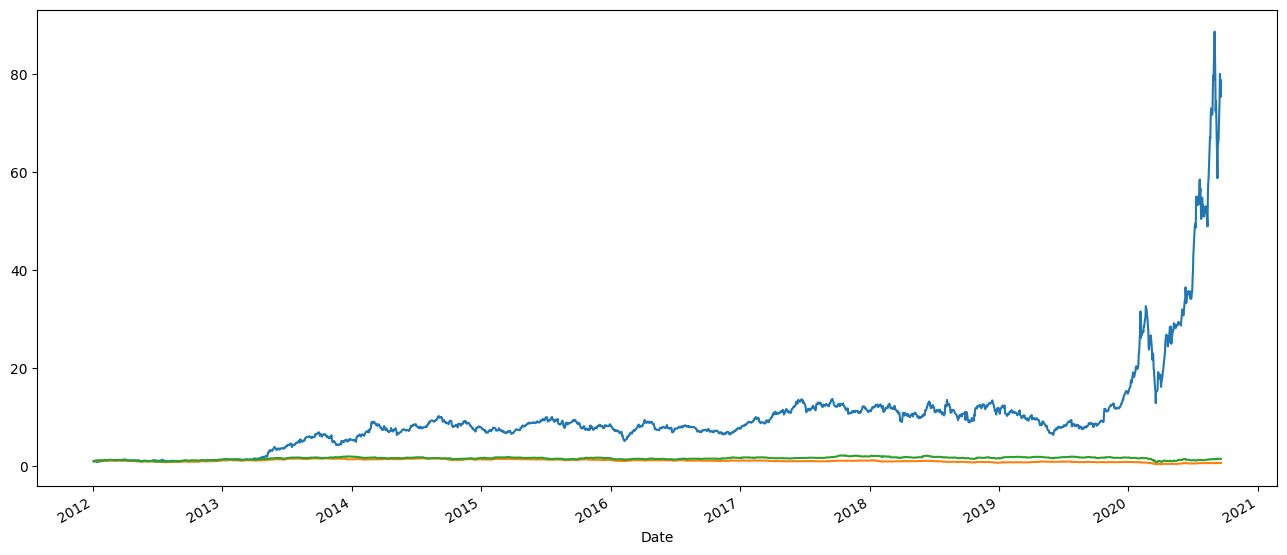

In [319]:
tesla['Cumulative_Return'].plot(label='Tesla', figsize=(16,7))
ford['Cumulative_Return'].plot(label='Ford', figsize=(16,7))
gm['Cumulative_Return'].plot(label='GM', figsize=(16,7))

In [ ]:

# tesla['returns'].plot(kind='kde', label='Tesla')  # w kde: kernal density estimate


In [449]:
import datetime
d = datetime.datetime.now()

In [599]:
print(strftime('%S'))  #  prints seconds realtime  Now
print(strftime('%M'))

21
39


In [601]:
t1 = tesla.copy()

In [606]:
t1.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2020-09-04', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18'],
              dtype='datetime64[ns]', name='Date', length=2193, freq=None)

In [604]:
t1.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Total_Traded',
       'returns', 'Comulative_Return', 'Cumulative_Return'],
      dtype='object')

In [658]:
a = t1.loc[['2012-01-03', '2012-01-05' ]]
a

,High,Low,Open,Close,Volume,Adj Close,Total_Traded,returns,Comulative_Return,Cumulative_Return
Date,,,,,,,,,,
2012-01-03,1.966667,1.843333,1.929333,1.872,13921500.0,1.872,2.685921e+07,NaN,NaN,NaN
2012-01-05,1.862000,1.790000,1.850667,1.808,15082500.0,1.808,2.791269e+07,-0.021292,0.965812,0.965812


In [659]:
a = t1.loc[['2012-01-03', '2012-01-05' ]]
b = t1.loc[:, ['Volume','Low', 'Close', 'Open']]
indexRows = zip(b,a)
indexRows = pd.MultiIndex.from_tuples(indexRows)
dfM = pd.DataFrame(t1, indexRows, ['Volume', 'Close', 'Open'])

In [660]:
dfM.sample()
dfM.shape
dfM.head()

,,Volume,Close,Open
Volume,High,NaN,NaN,NaN
Low,Low,NaN,NaN,NaN
Close,Open,NaN,NaN,NaN
Open,Close,NaN,NaN,NaN


### Aggregate Functions 

In [664]:
t1.reset_index()
t1.head()

,High,Low,Open,Close,Volume,Adj Close,Total_Traded,returns,Comulative_Return,Cumulative_Return
Date,,,,,,,,,,
2012-01-03,1.966667,1.843333,1.929333,1.872000,13921500.0,1.872000,2.685921e+07,NaN,NaN,NaN
2012-01-04,1.911333,1.833333,1.880667,1.847333,9451500.0,1.847333,1.777512e+07,-0.013177,0.986823,0.986823
2012-01-05,1.862000,1.790000,1.850667,1.808000,15082500.0,1.808000,2.791269e+07,-0.021292,0.965812,0.965812
2012-01-06,1.852667,1.760667,1.813333,1.794000,14794500.0,1.794000,2.682736e+07,-0.007743,0.958333,0.958333
2012-01-09,1.832667,1.741333,1.800000,1.816667,13455000.0,1.816667,2.421900e+07,0.012635,0.970442,0.970442


In [671]:
t2.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total_Traded,returns,Comulative_Return,Cumulative_Return
0,2012-01-03,1.966667,1.843333,1.929333,1.872000,13921500.0,1.872000,2.685921e+07,NaN,NaN,NaN
1,2012-01-04,1.911333,1.833333,1.880667,1.847333,9451500.0,1.847333,1.777512e+07,-0.013177,0.986823,0.986823
2,2012-01-05,1.862000,1.790000,1.850667,1.808000,15082500.0,1.808000,2.791269e+07,-0.021292,0.965812,0.965812
3,2012-01-06,1.852667,1.760667,1.813333,1.794000,14794500.0,1.794000,2.682736e+07,-0.007743,0.958333,0.958333
4,2012-01-09,1.832667,1.741333,1.800000,1.816667,13455000.0,1.816667,2.421900e+07,0.012635,0.970442,0.970442


In [672]:
t2.describe()

,High,Low,Open,Close,Volume,Adj Close,Total_Traded,returns,Comulative_Return,Cumulative_Return
count,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03,2193.000000,2.193000e+03,2192.000000,2192.000000,2192.000000
mean,19.093109,18.259909,18.680992,18.699198,1.067557e+08,18.699198,2.787397e+09,0.002604,9.992989,9.992989
std,19.717996,18.364949,19.048100,19.117542,8.831035e+07,19.117542,5.640075e+09,0.035061,10.212887,10.212887
min,1.790000,1.509333,1.774667,1.519333,5.473500e+06,1.519333,1.208549e+07,-0.210628,0.811610,0.811610
25%,12.586000,12.093333,12.298667,12.333333,5.157900e+07,12.333333,7.320103e+08,-0.013951,6.588854,6.588854
50%,15.830000,15.274667,15.558667,15.516000,8.443200e+07,15.516000,1.357660e+09,0.001218,8.292201,8.292201
75%,20.975332,20.242666,20.655333,20.610666,1.318965e+08,20.610666,2.326802e+09,0.018187,11.013711,11.013711
max,167.496674,156.836670,167.380005,166.106674,9.140820e+08,166.106674,6.467678e+10,0.243951,88.732199,88.732199


In [669]:
t2 = t1.reset_index()

In [675]:
t2Open = t2.groupby('Open')

In [678]:
print(t2Open)

## Merging

### Unique vals

### Functions

In [683]:
t2['Open'].head()

0         1.929333
1         1.880667
2         1.850667
3         1.813333
4         1.800000
           ...    
2188    126.983330
2189    145.520004
2190    146.623337
2191    138.533340
2192    149.313339
Name: Open, Length: 2193, dtype: float64

In [691]:
t2['Open'].dtype

dtype('float64')

In [689]:
t3 = t2['Open'].apply(lambda x: x + t2['Open'].shift(-1))
t3.head()

,0,1,2,3,4,5,6,7,8,9,...,2183,2184,2185,2186,2187,2188,2189,2190,2191,2192
0,3.810000,3.780000,3.742666,3.729333,3.758666,3.770666,3.828000,3.822666,3.704000,3.708666,...,120.595997,120.796002,130.665997,129.242665,128.912663,147.449337,148.552670,140.462673,151.242672,NaN
1,3.761334,3.731334,3.694000,3.680667,3.710000,3.722000,3.779334,3.774000,3.655334,3.660000,...,120.547331,120.747336,130.617331,129.193999,128.863997,147.400671,148.504004,140.414007,151.194006,NaN
2,3.731334,3.701334,3.664000,3.650667,3.680000,3.692000,3.749334,3.744000,3.625334,3.630000,...,120.517331,120.717336,130.587331,129.163999,128.833997,147.370671,148.474004,140.384007,151.164006,NaN
3,3.694000,3.664000,3.626666,3.613333,3.642666,3.654666,3.712000,3.706666,3.588000,3.592666,...,120.479997,120.680002,130.549997,129.126665,128.796663,147.333337,148.436670,140.346673,151.126672,NaN
4,3.680667,3.650667,3.613333,3.600000,3.629333,3.641333,3.698667,3.693333,3.574667,3.579333,...,120.466664,120.666669,130.536664,129.113332,128.783330,147.320004,148.423337,140.333340,151.113339,NaN
